<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 5:  Programación dinámica: Problema de la subsecuencia máxima</br>
# Ibarra Soto Alejandro
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

<h1>Subsecuencia</h1>
Una subsecuencia es una secuencia que puede derivarse de otra secuencia al eliminar algunos elementos sin cambiar el orden de los elementos restantes. Digamos que tenemos una cadena ABC . Si borramos cero o uno o más de un carácter de esta cadena obtenemos la subsecuencia de esta cadena. Así que las subsecuencias de la cadena ABC serán { "A" , "B" , "C" , "AB" , "AC" , "BC" , "ABC" , "" }. Incluso si eliminamos todos los caracteres, la cadena vacía también será una subsecuencia. Para averiguar la subsecuencia, para cada carácter de una cadena, tenemos dos opciones: o tomamos el carácter o no. Entonces, si la longitud de la cadena es n , hay 2 n subsecuencias de esa cadena.

<h3>Subsecuencia más larga:</h3>

Como el nombre sugiere, de todas las subsecuencias comunes entre dos cadenas, la subsecuencia común más larga (LCS) es la que tiene la longitud máxima. Por ejemplo: las subsecuencias comunes entre "HELLOM" y "HMLD" son "H" , "HL" , "HM", etc. Aquí "HLL" es la subsecuencia común más larga que tiene la longitud 3.
<h2> Método de divide y vencerás</h2>
Lo que se hace para el método de divide y vencerás es, ya que se tienen las dos cadenas, por un lado se le quita el primer caracter a una cadena y se saca la subsecuencia de esta nueva cadena con la cadena 2, y por el otro lado se realiza el mismo procedimiento, se le remueve el caracter inicial a la cadena 2 y se comprueba con la cadena 1, siguiendo ciertas reglas, que son:
<ul>
    <li>LCS(X,0) = LCS(0,Y) = 0</li>
    <li>LCS(AX,AY)=LCS(X,Y)+1</li>
    <li>LCS(AX,BY)=max(LCS(X,BY),LCS(AX,Y))</li>
</ul>
Esto nos permite obtener el tamaño de la cadena más larga, y con la implementación adecuada se tiene que también se obtiene la subcadena.
<h2>Método de programación dinámica</h2>
Este método lo que hace es en un matriz guardar las posibles subsecuencias, almacenando en cada casilla el tamaño y de donde proviene la subsecuencia, siguiendo estas tres reglas:
<ul>
    <li>(X,0) = (0,Y) = 0</li>
    <li>(X,X) = Diagonal+1</li>
    <li>(X,Y) = max(arriba,izquierda)</li>
</ul>
De forma que un ejemplo de llenado es el siguiente:
<center><img src="i1.png"></center></br>
Dicha matriz tiene tanto la fila 0 como la columna 0 inicializadas en 0 por la primer regla, posteriormente se recorre de izquierda a derecha, y de arriba hacia abajo, siguiendo las reglas antes enunciadas, es así, que se lográ completar el llenado de la matriz, donde en la casilla inferior derecha se encuentra el tamaño de la subsecuencia máxima, y para determinarla unicamente hay que seguir el recorrido desde esa casilla hasta lelgar a una que tega el valor 0, siguiendo siempre las diagonales, pues son las más importantes.</br>
La complejidad del tiempo para este algoritmo es: O (mn) donde m y n denota la longitud de cada cadena.

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

**Definir la función para generar las cadenas**

In [2]:
def generarCadena(tam):
    cad=""
    for i in range(tam):
        cad=cad+chr(random.randint(97,122))
    return cad

**Definir la función de divide y vencerás**

In [3]:
def LCS_DV(cad1,cad2):
    n1 = len(cad1)+1
    n2 = len(cad2)+1
    if((len(cad1)==0) or (len(cad2)==0)):
        arr=[0,""]
        return arr
    if(cad2[0] == cad1[0]):
        aux=LCS_DV(cad1[1:],cad2[1:])
        tam=aux[0]+1
        cad=cad2[0]+aux[1]
        arr=[tam,cad]
        return arr
    else:
        aux1=LCS_DV(cad1[1:],cad2[0:])
        aux2=LCS_DV(cad1[0:],cad2[1:])
        if(aux1[0]>aux2[0]):
            return aux1
        return aux2

**Definir la función de programación dinámica**

In [4]:
def LCS(cad1,cad2):
    n1 = len(cad1)+1
    n2 = len(cad2)+1
    M = np.zeros((n1,n2,2))
    for i in range(1,n1):
        for j in range(1,n2):
            if(cad2[j-1] == cad1[i-1]):
                M[i,j,0]=1+M[i-1,j-1,0]
                #0 arriba, 1 izquierda, 2 ambos, 3 diagonal
                M[i,j,1]=3
            else:
                M[i,j,0]=max(M[i-1,j,0],M[i,j-1,0])
                if(M[i-1,j,0]==M[i,j-1,0]):
                    M[i,j,1]=2
                else:
                    if(M[i-1,j,0]<M[i,j-1,0]):
                        M[i,j,1]=1
                    else:
                        M[i,j,1]=0
    aux=1
    subsecuencia = []
    while(aux!=0):
        aux=M[i,j,0]
        if(M[i,j,1]==3):
            i=i-1
            j=j-1
            subsecuencia.insert(0,cad1[i])
        else:
            if((M[i,j,1]==2) or (M[i,j,1]==0)):
                i=i-1
            else:
                j=j-1
    return ''.join(subsecuencia)

# Pruebas 

A continuación, se crearán cadenas de 10, 100, 1000, 10000, 100000, 1000000 caracteres

In [5]:
from time import time
timePD = [0] * (6)
timeDV = [0] * (6)

# Datos de tamaño 10

In [6]:
tam=10
cad10=generarCadena(tam)
cad20=generarCadena(tam)
print(cad10)
print(cad20)

uqqobuvvxc
ywxkwfqvli


**Divide y vencerás**

In [7]:
start_time = time()
subsecuencia=LCS_DV(cad10,cad20)
print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[0]=elapsed_time

qv


**Programación dinámica**

In [8]:
start_time = time()
print(LCS(cad10,cad20))
elapsed_time = time() - start_time
timePD[0]=elapsed_time

qv


# Datos de tamaño 100

In [9]:
tam=100
cad11=generarCadena(tam)
cad21=generarCadena(tam)
print(cad11)
print(cad21)

trarvxyfrruwuttajraillloizbtasjvslxbpscdiossrhxjzfllxanywwfpwurmzpoxvjpkzfbvuvcblmkjgjzkzugovyglirum
wsbrfggssxfalvnjfmcftxhebqrzczgvkafccgwaqwyfdrpoanmlcngveniukzdhliuklykldhxwovxagguzofigwtbavqdpukpk


**Divide y vencerás**

In [ ]:
start_time = time()
subsecuencia=LCS_DV(cad11,cad21)
print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[1]=elapsed_time

**Programación dinámica**

In [11]:
start_time = time()
print(LCS(cad11,cad21))
elapsed_time = time() - start_time
timePD[1]=elapsed_time

rxfajtxbczfayfrpovkzulkgzgvu


# Datos de tamaño 1000

In [12]:
tam=1000
cad12=generarCadena(tam)
cad22=generarCadena(tam)
print(cad12)
print(cad22)

dbbicnvefhvetkwymucjxqgcnrvnuylhqbqujnbkvkjvhlykicqqsfktglhavoufnnfrpvmiohgllbfzonwhkkugokmxckkulqxrignrdtogcmxjtryrpjnhqagvgeipoohocecuwmlcyscsizqqazkpdwgqufaspxfvahtyqqvssglbuivncyhcnpcqnnhrxewjmvxiciyjogrfkpscgicisbhexbhfuijikryenfdeyoebbqqmmgbmehsunuewtzjoyihlszelocoemzfvywezhzqmxaccbdkojqcoitcopmfpjyaoagdafmcvxvynqigyruzulcnuazipfzphhcpaxbfaevfaamhvnwdhqmnsivmaockfjniahqtifsbpssqdpeaelhdrnednkithumqvlrkuttlfdjtimoqiwrugooxjhlhemkkawbkyepdwrmsycqmzyieywaszjtqdvztbfbemuuemqxphdihdgoretvuduyvjahtdizlxmdndcnaslfncldlhvscnovxvdenbmvmrqzfgcpkejeumqwzefqqpnkfrxhiquafkcypnqkyunpuhmupkulkevfbikqfpedysbesztskhguptxudberdxonwwsrbsdepkbtrtdcgsnnubdbusythfhmwhsrjlrqrusedtqnzkamboktabaysdnricgctzawwzchbsjlbzvzifdpdjlocdycjccddskydgytgrchgrgnaggjixizfnfwnzwknmiabyjhcwtrpvxruzhiepqsumwbidpmqmxhsfdmbjiufdehfmrxkrczokpcwrdowatrgyuufcokfomqorlmqrumaewwifkxwbygsbvwgmbcumriwhdjwrjkcmlmkwcnqbithczwljublzinhtpgnbmrmfqqgvdmkzmskcuhqqrstalitzjdcnsvhtjyfitkcdkifdsttihuhuhhozpxkzhwnoqrhesortvslrkcqcpdepzwch

**Divide y vencerás**

In [ ]:
start_time = time()
subsecuencia=LCS_DV(cad12,cad22)
print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[2]=elapsed_time

**Programación dinámica**

In [13]:
start_time = time()
print(LCS(cad12,cad22))
elapsed_time = time() - start_time
timePD[2]=elapsed_time

dicnftyucjxqgrvnhbjnbkkvyskafrhllbfonwhugoclgdxynaveihocecmlcqqkdquxvtvgbvypnhxwmxjgrcicbhxhjkryeneyounuwjleewdqifjdfcxvqiifxvmhvwikfnitnnkumlrkutimqulkaymycqieyzjvztbemehgtvudjhizlddnnhnvvnbvmpeunxpkyuhukuvfifptshguxdddetcnduqdzabokbasdncgwhjbzzpddddsggrhragjfzknjweqpukooargucoqleifwyvwgrdmlwcntzwblzmfqvkkqqlzvdduupxqeqd


# Datos de tamaño 10000

In [14]:
tam=10000
cad13=generarCadena(tam)
cad23=generarCadena(tam)
#print(cad13)
#print(cad23)

**Divide y vencerás**

In [ ]:
start_time = time()
subsecuencia=LCS_DV(cad13,cad23)
print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[3]=elapsed_time

**Programación dinámica**

In [15]:
start_time = time()
LCS(cad13,cad23)
elapsed_time = time() - start_time
timePD[3]=elapsed_time

# Datos de tamaño 100000

In [16]:
tam=100000
cad14=generarCadena(tam)
cad24=generarCadena(tam)
#print(cad14)
#print(cad24)

**Divide y vencerás**

In [ ]:
start_time = time()
subsecuencia=LCS_DV(cad14,cad24)
#print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[4]=elapsed_time

**Programación dinámica**

In [17]:
start_time = time()
LCS(cad14,cad24)
elapsed_time = time() - start_time
timePD[4]=elapsed_time

MemoryError: 

# Datos de tamaño 1000000

In [ ]:
tam=1000000
cad15=generarCadena(tam)
cad25=generarCadena(tam)
#print(cad15)
#print(cad25)

**Divide y vencerás**

In [ ]:
start_time = time()
subsecuencia=LCS_DV(cad15,cad25)
#print(subsecuencia[1])
elapsed_time = time() - start_time
timeDV[5]=elapsed_time

**Programación dinámica**

In [ ]:
start_time = time()
LCS(cad15,cad25)
elapsed_time = time() - start_time
timePD[5]=elapsed_time

# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: La implementación por divide y vencerás para cadenas de 100 caracteres no terminaba pasadas más de 3 horas, es por ello que se detuvieron**</br></br>
**Si se desea obtener los tiempos reales eliminar la siguiente celda y correr las celdas que tienen la ejecución correspondientes**

In [18]:
timeDV[1]=10800

In [25]:
print("Método:\t\t10 datos\t100 datos\t1000 datos\t10000 datos\t\t100000 datos\t\t1000000 datos\nPD\t\t%.10f"%timePD[0],"\t%.10f" %timePD[1], "\t%.10f" %timePD[2], 
      "\t%.10f" %timePD[3], "\t\t%.10f" %timePD[4], "\t\t%.10f" %timePD[5], "\nDV\t\t%.10f"%timeDV[0],
      "\t%.5f" %timeDV[1], "\t%.10f" %timeDV[2], "\t%.10f" %timeDV[3], "\t\t%.10f" %timeDV[4], "\t\t%.10f" %timeDV[5])

Método:		10 datos	100 datos	1000 datos	10000 datos		100000 datos		1000000 datos
PD		0.0000000000 	0.0129652023 	1.2152581215 	125.5402960777 		0.0000000000 		0.0000000000 
DV		0.0977847576 	10800.00000 	0.0000000000 	0.0000000000 		0.0000000000 		0.0000000000


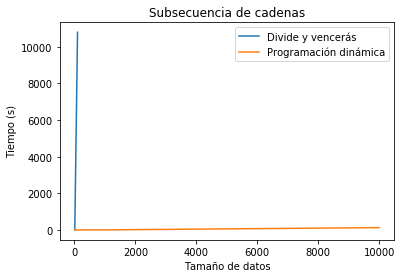

In [27]:
n=[10,100,1000,10000,100000,1000000]
plt.plot(n[:2],timeDV[:2],label="Divide y vencerás")
plt.plot(n[:4],timePD[:4],label="Programación dinámica")

plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo (s)')

plt.title("Subsecuencia de cadenas")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró en primera instancia resolver el problema de la subsecuencia más larga entre dos cadenas, esto se logró ralizar implementando dos métodos diferentes, el de programacion dinamica y el de divide y vencerás, se realizó de esta manera para poder comparar cuanto tiempo les tomaba a cada uno de estos para ejecutarse, esto nos permitió darnos cuenta que el de programación dinámica es rápido, sin embargo, requiere de una gran cantidad de memoria para guardar los datos requeridos, y el de divide y vencerás resulto ser bastante lento, pues mientras el de PD logró finalizar hasta cadenas de 10000 datos, la de DV unicamente terminó para 10 datos, aquí se puede observar de una mejor manera la diferencia entre estos dos métodos y la utilidad de implementar la programacion dinamica, sin embargo, al igual que el problema de la multiplicacion de matrices no se puede confiar plenamente en este, pues al requerir de una gran cantidad de memoria se encuentra limitado por la computadora donde se ejecute, es importante mencionar que a pesar de ello este es una técnica que permite ejecutar lso algoritmos de una forma bastante rápida y en este caso, al determinar la subsecuencia máxima de dos cadenas, se demostró que efectivamente es bastante rápido, generando tiempos bastante bueno y nos deja ver que esta técnica cumple con su objetivo de agilizar los algoritmos.